# Models

# k-Nearest Neighbors (k-NN)

**k-Nearest Neighbors (k-NN)** is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression tasks. The k-NN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

## Concept

k-NN works by finding the distances between a query and all the examples in the data, selecting the specified number `k` nearest neighbors (top k examples with the smallest distances), and performing a majority vote (for classification) or averaging (for regression) on these neighbors.

## Steps Involved

1. **Calculate Distance:** Compute the distance between the point in question and every other point in the dataset.
2. **Find Nearest Neighbors:** Identify the `k` closest points based on these calculated distances.
3. **Vote for Labels:** For classification, the label of the new point is determined by a majority vote of the `k` nearest neighbors. For regression, it is the average of the values of the `k` nearest neighbors.

## Distance Metrics

The choice of distance metric depends on the type of data:
- **Euclidean Distance:** Most common for continuous data.
- **Manhattan Distance:** Used for ordinal or vector data.
- **Hamming Distance:** Used for categorical data.

## Hyperparameters

- **Number of Neighbors (k):** Determines how many neighbors will influence the classification or regression. Choosing the right `k` is crucial for performance.
- **Weight Function:** Typically, neighbors are weighted equally. However, sometimes it might be beneficial to weight neighbors differently based on distance.

## Choosing the Right `k`

- **Too small `k`:** Makes the model sensitive to noise in the dataset.
- **Too large `k`:** Makes the boundaries between classes less distinct.

## Applications

k-NN is widely used in:
- Medical diagnosis,
- Pattern recognition,
- Recommendation systems (e.g., suggesting similar products).

## Example

Here's a simple example of using k-NN for a classification problem: predicting whether a new email is spam based on features like the frequency of certain keywords, presence of attachments, and length of the message.



# Implementation

### Data Desription

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import necessary libraries
from IPython.display import Image, display
import ipywidgets as widgets
from ipywidgets import interactive

# Image URLs
images = {
    'Iris Setosa': 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg',
    'Iris Versicolor': 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
    'Iris Virginica': 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
}

# Function to display image based on selection
def display_image(flower):
    display(Image(url=images[flower],width=300, height=300))

# Create a RadioButtons widget to select the flower type
flower_selector = widgets.RadioButtons(
    options=list(images.keys()),
    value='Iris Setosa',  # Default value
    description='Flowers:',
    disabled=False,
    layout={'width': 'max-content'}  # Set the width to the content of the longest label
)

# Customize the layout to display radio buttons horizontally
flower_selector.layout.flex_flow = 'row'

# Create an interactive widget
interactive_display = interactive(display_image, flower=flower_selector)

# Display the interactive widget
display(interactive_display)


interactive(children=(RadioButtons(description='Flowers:', layout=Layout(flex_flow='row', width='max-content')…

### Import data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


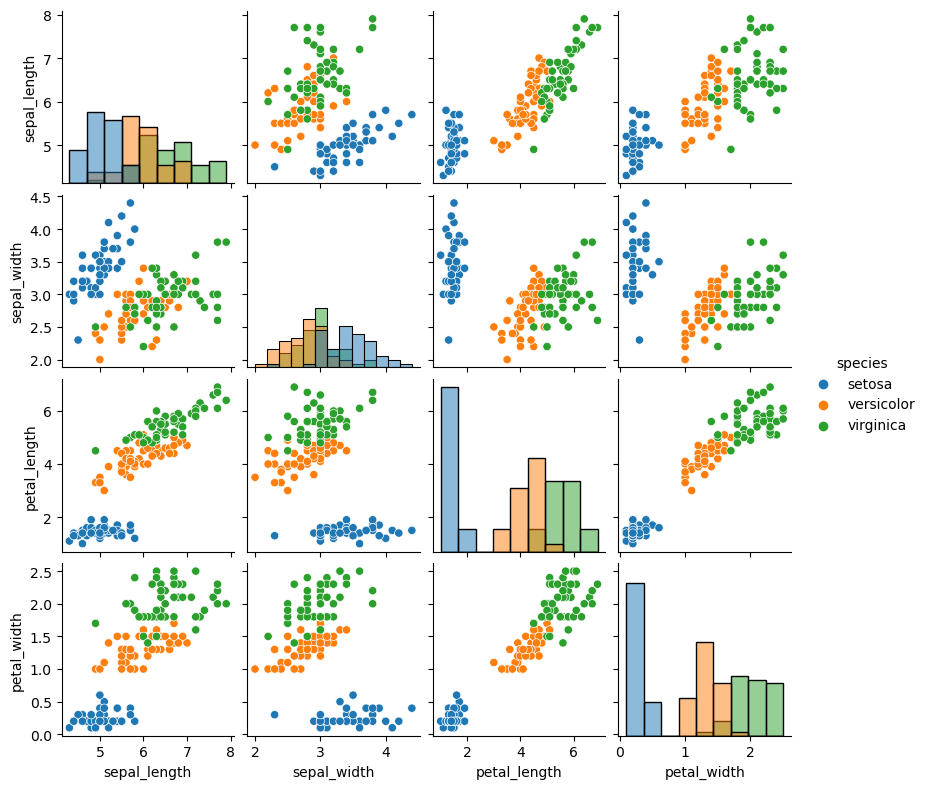

In [5]:
iris = sns.load_dataset('iris')
display(iris.head())

sns.pairplot(data=iris,hue="species",diag_kind="hist", height=2)

### Split data into training and testing

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display, clear_output

X = iris.iloc[:, :-1]  # all rows, all columns except the last one
y = iris.iloc[:, -1]   # all rows, just the last column
# Function to split data and display the shape of the splits

X_train, X_test, y_train, y_test = None, None, None, None

def split_data(button):
    global X_train, X_test, y_train, y_test  # Declare the use of global variables
    test_size = test_size_slider.value
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Display the output
    with out:
        clear_output(wait=True)
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

# Create output widget
out = widgets.Output()


# Create slider for test size
test_size_slider = widgets.FloatSlider(
    value=0.25,  # Default split 75%-25%
    min=0.1,
    max=0.9,
    step=0.05,
    description='Test Size:',
    readout_format='.2f',  # Display format
)

# Create an Apply button
apply_button = widgets.Button(description="Apply Changes")

# Set up button click event to trigger the data split
apply_button.on_click(split_data)

# Organize widgets in a vertical box
widgets_box = widgets.VBox([test_size_slider, apply_button, out])

# Display the widgets
display(widgets_box)

### kNN

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import ipywidgets as widgets
from IPython.display import display

# Assuming X_train and y_train, X_test, y_test are already defined

# Standardize the training and test data (assuming X_train and X_test are defined in the global scope)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize global variable for KNN classifier
knn = None
y_pred = None

# Function to train KNN and print accuracy
def train_knn(button):
    global n_neighbors, p, metric, knn, y_pred
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=p, metric=metric)
    knn.fit(X_train_std, y_train)
    train_accuracy = knn.score(X_train_std, y_train)
    test_accuracy = knn.score(X_test_std, y_test)*100
    y_pred = knn.predict(X_test_std)
    # Display the output
    with out:
        clear_output(wait=True)
        print(f'The accuracy of the KNN classifier is {test_accuracy:.1f}% on test data')
# Create output widget
out = widgets.Output()

# Function to update KNN parameters
def update_params(change):
    global n_neighbors, p, metric
    n_neighbors = n_neighbors_slider.value
    p = p_slider.value
    metric = metric_dropdown.value

# Create sliders for KNN parameters
n_neighbors_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=15,
    step=1,
    description='n_neighbors:'
)

p_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='p:'
)

# Create dropdown for metric selection
metric_dropdown = widgets.Dropdown(
    options=['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
    value='minkowski',
    description='Metric:'
)

# Create a button to train the model
train_button = widgets.Button(description="Train")

# Link parameter widgets to the update_params function
n_neighbors_slider.observe(update_params, 'value')
p_slider.observe(update_params, 'value')
metric_dropdown.observe(update_params, 'value')

# Set up button click event to trigger the data split
train_button.on_click(train_knn)

# Organize widgets in a vertical box
widgets_box = widgets.VBox([n_neighbors_slider, p_slider, metric_dropdown, train_button, out])

# Display the widgets
display(widgets_box)


In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Visualization

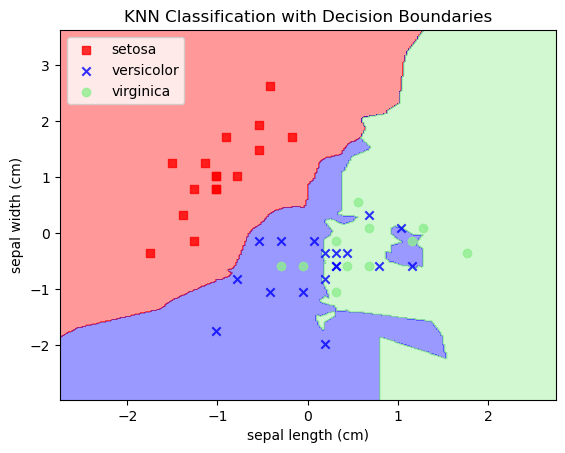

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Split the dataset into training and test sets
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_std[:, :2], y_train)  # Fit using only the first two features

def plot_decision_regions(data, X, y, classifier, resolution=0.02):
    X = X[:, :2]  # Take the first two features for visualization

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.title('KNN Classification with Decision Boundaries')

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=data.target_names[cl])

# Plot the decision regions
plot_decision_regions(iris, X_test_std, y_test, knn_model)

# Add a legend and show the plot
plt.legend(loc='upper left')
plt.show()
